# Neural Networks image recognition - ConvNet

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.
4. Compare these results with the previous week where we used a MultiLayer Perceptron (this week we use a ConvNet). 

# Neural Networks - Image Recognition 

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [3]:
# input image dimensions
img_rows, img_cols = 28, 28
num_classes = 10

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### <font color='purple'> First, I am running the network without noise added as a baseline.</font>

In [12]:
batch_size = 128
num_classes = 10
epochs = 12



model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
baseline_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', baseline_score[0])
print('Test accuracy:', baseline_score[1])
baseline_accuracy = baseline_score[1]

Epoch 1/12
469/469 [==============================] - 28s 59ms/step - loss: 0.2552 - accuracy: 0.9234 - val_loss: 0.0526 - val_accuracy: 0.9832
Epoch 2/12
469/469 [==============================] - 28s 60ms/step - loss: 0.0862 - accuracy: 0.9743 - val_loss: 0.0375 - val_accuracy: 0.9866
Epoch 3/12
469/469 [==============================] - 28s 61ms/step - loss: 0.0665 - accuracy: 0.9798 - val_loss: 0.0353 - val_accuracy: 0.9890
Epoch 4/12
469/469 [==============================] - 28s 60ms/step - loss: 0.0547 - accuracy: 0.9830 - val_loss: 0.0318 - val_accuracy: 0.9890
Epoch 5/12
469/469 [==============================] - 28s 59ms/step - loss: 0.0459 - accuracy: 0.9856 - val_loss: 0.0280 - val_accuracy: 0.9903
Epoch 6/12
469/469 [==============================] - 28s 60ms/step - loss: 0.0401 - accuracy: 0.9878 - val_loss: 0.0289 - val_accuracy: 0.9902
Epoch 7/12
469/469 [==============================] - 28s 60ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.0301 - val_accuracy:

In [13]:
baseline_accuracy

0.9923999905586243

### <font color='purple'> Below, I am printing some images and their labels from the unaltered (baseline) dataset.</font>

In [14]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape


((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

In [15]:
import matplotlib.pyplot as  plt
%matplotlib inline

import numpy as np

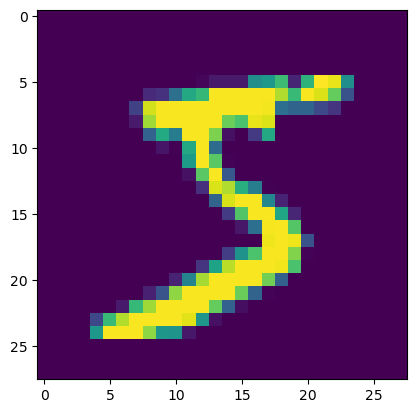

In [18]:
plt.imshow(x_train[0])

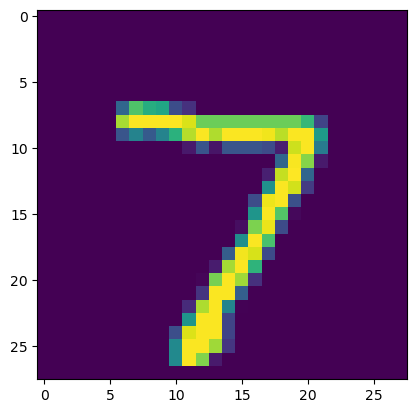

In [19]:
plt.imshow(x_test[0])

In [20]:
from numpy import argmax

argmax(keras.utils.to_categorical(y_train[0], 10),axis=1)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [21]:
argmax(keras.utils.to_categorical(y_test[0], 10),axis=1)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

### <font color='purple'> Adding noise here</font>

In [24]:
scale = [0.1, 0.5, 1.0, 2.0, 4.0]

noise_0_train = np.random.normal(scale=0.1, size=[60000,28,28,1])
noise_1_train = np.random.normal(scale=0.5, size=[60000,28,28,1])
noise_2_train = np.random.normal(scale=1.0, size=[60000,28,28,1])
noise_3_train = np.random.normal(scale=2.0, size=[60000,28,28,1])
noise_4_train = np.random.normal(scale=4.0, size=[60000,28,28,1])

noise_0_test = np.random.normal(scale=0.1, size=[10000,28,28,1])
noise_1_test = np.random.normal(scale=0.5, size=[10000,28,28,1])
noise_2_test = np.random.normal(scale=1.0, size=[10000,28,28,1])
noise_3_test = np.random.normal(scale=2.0, size=[10000,28,28,1])
noise_4_test = np.random.normal(scale=4.0, size=[10000,28,28,1])

In [25]:
x_train_n0 = x_train + noise_0_train
x_train_n1 = x_train + noise_1_train
x_train_n2 = x_train + noise_2_train
x_train_n3 = x_train + noise_3_train
x_train_n4 = x_train + noise_4_train

x_test_n0 = x_test + noise_0_test
x_test_n1 = x_test + noise_1_test
x_test_n2 = x_test + noise_2_test
x_test_n3 = x_test + noise_3_test
x_test_n4 = x_test + noise_4_test

### <font color='purple'> Inspecting noisy images here</font>

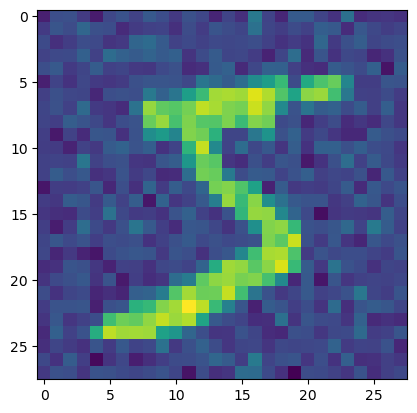

In [26]:
plt.imshow(x_train_n0[0])

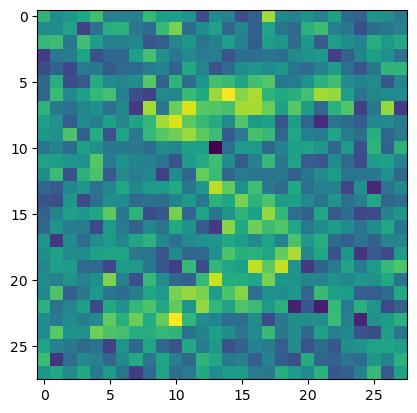

In [27]:
plt.imshow(x_train_n1[0])

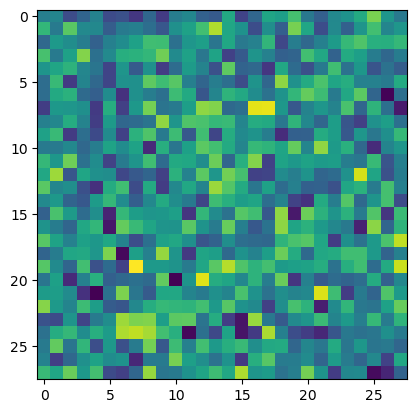

In [28]:
plt.imshow(x_train_n2[0])

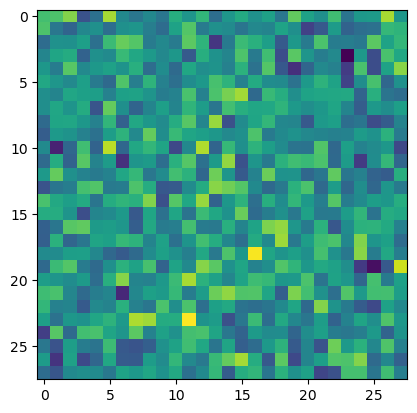

In [29]:
plt.imshow(x_train_n3[0])

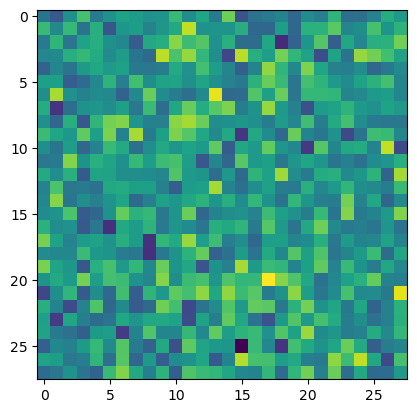

In [30]:
plt.imshow(x_train_n4[0])

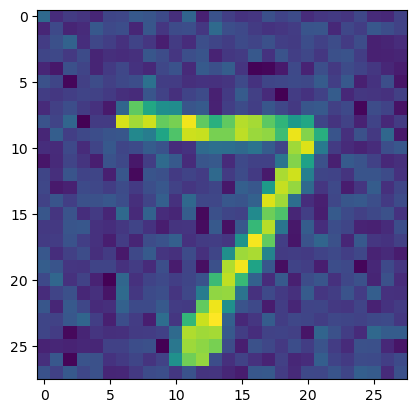

In [31]:
plt.imshow(x_test_n0[0])

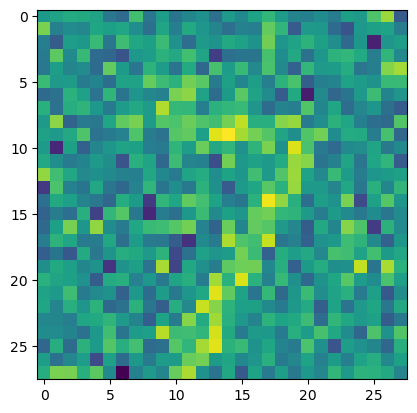

In [32]:
plt.imshow(x_test_n1[0])

### <font color='purple'> I will use the following code chunks to train the CNN with the different noise parameters (created above). I will also keep track of each accuracy score output, in respect to the noise parameters used during training.</font>

In [36]:
batch_size = 128
num_classes = 10
epochs = 12

x_train_noisy = [x_train_n0, x_train_n1, x_train_n2, x_train_n3, x_train_n4]
x_test_noisy = [x_test_n0, x_test_n1, x_test_n2, x_test_n3, x_test_n4]

noisy_scores = []


for i in [0,1,2,3,4]:
    model_noisy = Sequential()
    model_noisy.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
    model_noisy.add(Conv2D(64, (3, 3), activation='relu'))
    model_noisy.add(MaxPooling2D(pool_size=(2, 2)))
    model_noisy.add(Dropout(0.25))
    model_noisy.add(Flatten())
    model_noisy.add(Dense(128, activation='relu'))
    model_noisy.add(Dropout(0.5))
    model_noisy.add(Dense(num_classes, activation='softmax'))
    
    model_noisy.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

    history_noisy = model_noisy.fit(x_train_noisy[i], y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test_noisy[i], y_test))
    
    score_noisy = model_noisy.evaluate(x_test_noisy[i], y_test, verbose=0)
    
    noisy_scores.append(score_noisy[1])
    


Epoch 1/12
469/469 [==============================] - 28s 59ms/step - loss: 0.2651 - accuracy: 0.9194 - val_loss: 0.0596 - val_accuracy: 0.9816
Epoch 2/12
469/469 [==============================] - 28s 59ms/step - loss: 0.0974 - accuracy: 0.9711 - val_loss: 0.0459 - val_accuracy: 0.9856
Epoch 3/12
469/469 [==============================] - 28s 59ms/step - loss: 0.0711 - accuracy: 0.9783 - val_loss: 0.0430 - val_accuracy: 0.9852
Epoch 4/12
469/469 [==============================] - 28s 61ms/step - loss: 0.0603 - accuracy: 0.9816 - val_loss: 0.0368 - val_accuracy: 0.9884
Epoch 5/12
469/469 [==============================] - 29s 62ms/step - loss: 0.0492 - accuracy: 0.9852 - val_loss: 0.0327 - val_accuracy: 0.9892
Epoch 6/12
469/469 [==============================] - 29s 61ms/step - loss: 0.0447 - accuracy: 0.9856 - val_loss: 0.0317 - val_accuracy: 0.9898
Epoch 7/12
469/469 [==============================] - 27s 58ms/step - loss: 0.0391 - accuracy: 0.9872 - val_loss: 0.0362 - val_accuracy:

Epoch 10/12
469/469 [==============================] - 31s 66ms/step - loss: 2.2401 - accuracy: 0.1568 - val_loss: 2.2131 - val_accuracy: 0.2119
Epoch 11/12
469/469 [==============================] - 30s 64ms/step - loss: 2.2380 - accuracy: 0.1576 - val_loss: 2.2054 - val_accuracy: 0.2060
Epoch 12/12
469/469 [==============================] - 30s 65ms/step - loss: 2.2326 - accuracy: 0.1626 - val_loss: 2.1990 - val_accuracy: 0.2118


In [37]:
baseline_accuracy, noisy_scores

(0.9923999905586243,
 [0.9923999905586243,
  0.9668999910354614,
  0.8327999711036682,
  0.4726000130176544,
  0.2117999941110611])

([<matplotlib.axis.XTick at 0x166eec190>,
 [Text(0.1, 0, '0.1'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(2.0, 0, '2.0'),
  Text(4.0, 0, '4.0')])

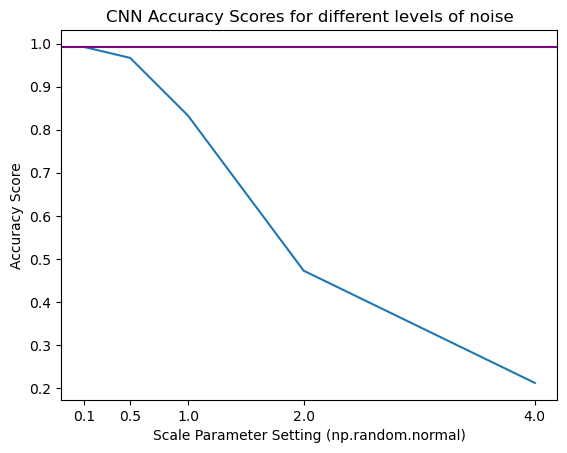

In [38]:
plt.figure()
plt.xlabel('Scale Parameter Setting (np.random.normal)')
plt.ylabel('Accuracy Score')
plt.plot(scale, noisy_scores)
plt.axhline(baseline_accuracy, color='purple') # baseline accuracy score
plt.title("CNN Accuracy Scores for different levels of noise")
plt.xticks(ticks=scale)

### <font color='purple'> The purple, horizontal line, in the plot above represents the baseline (unmodified data's) accuracy score. 

### <font color='purple'> In relation to the neural network from last week's assignment, this model was more accurate in all categories. The convolutional neural network:
    
#### <font color='purple'>Had a higher overall accuracy score
#### <font color='purple'>Experienced a slower rate of decrease in accuracy score, as noise was added to the input. 
#### <font color='purple'>Ended up having higher accuracy scores than last week's model in all noise categories. <font>